## Data Science - Stock Market Analysis Project

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

# For time stamps
from datetime import datetime

In [ ]:
endtime = datetime.now()
start = datetime(endtime.year-1,endtime.month,endtime.day)
stock_list = ['AAPL','TSLA','GOOG','NVDA','AMZN']

for stock in stock_list:
    globals()[stock] = web.get_data_yahoo(stock, start = start, end = endtime)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


print Tesla stock data.

In [ ]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
...,...,...,...,...,...,...
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.601873,211.030279,201.927610,206.521753,206.521753,1.363121e+08
std,44.842363,45.211033,44.544121,44.884272,44.884272,3.981693e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.635002,182.419998,172.504997,178.474998,178.474998,1.082858e+08
50%,197.929993,202.800003,192.889999,197.369995,197.369995,1.283462e+08
75%,249.385002,255.080002,244.464996,250.215004,250.215004,1.610392e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-01 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


#### Plot the closing price over the time frame specified.

<Axes: xlabel='Date'>

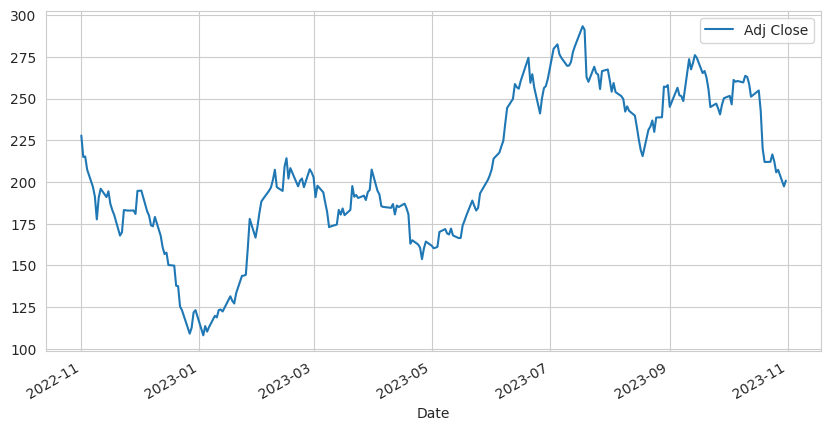

In [ ]:
TSLA['Adj Close'].plot(legend=True, figsize=(10, 5))

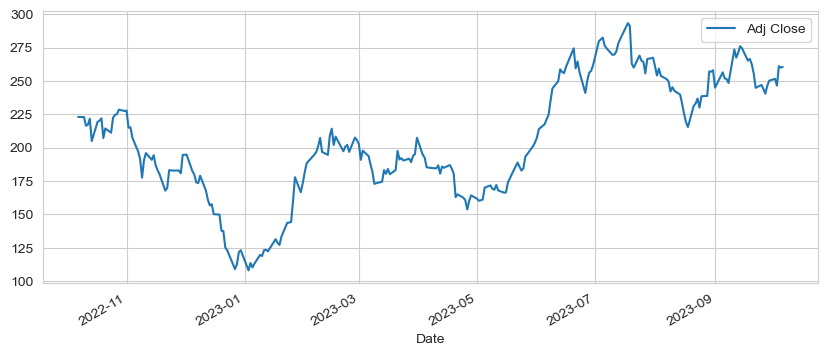

#### Plot the stock volume over the time frame.

<Axes: xlabel='Date'>

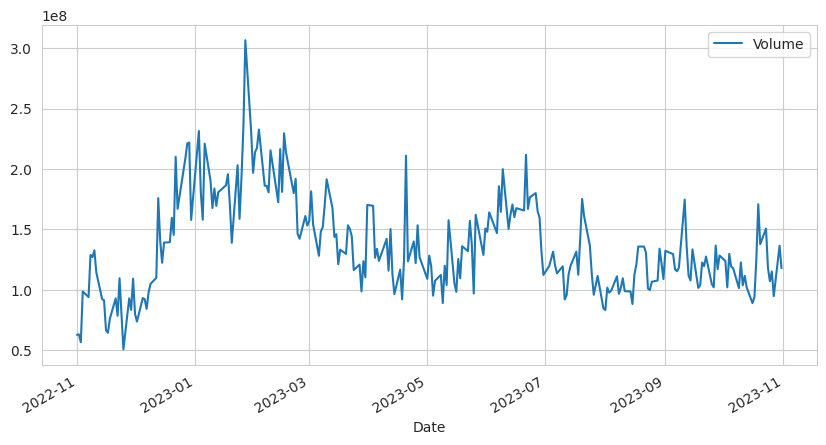

In [ ]:
TSLA['Volume'].plot(legend=True, figsize=(10, 5))

### Moving Averages

finding the stock prices within a window of size n.

In [ ]:
days = 20
TSLA["Adj Close"].rolling(days)

Rolling [window=20,center=False,axis=0,method=single]



```
# This is formatted as code
```

calling .mean() on this window to get our moving average.

In [ ]:
TSLA["Adj Close"].rolling(days).mean()

Date
2022-11-01           NaN
2022-11-02           NaN
2022-11-03           NaN
2022-11-04           NaN
2022-11-07           NaN
                 ...    
2023-10-25    244.865500
2023-10-26    242.834499
2023-10-27    240.688499
2023-10-30    237.976499
2023-10-31    235.691999
Name: Adj Close, Length: 251, dtype: float64

In [ ]:
TSLA["Adj Close"].rolling(days).mean().info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 251 entries, 2022-11-01 to 2023-10-31
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
232 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#### Plot the 10-day, 20-day, and 50-day moving average for the stock's closing price.

<Axes: xlabel='Date'>

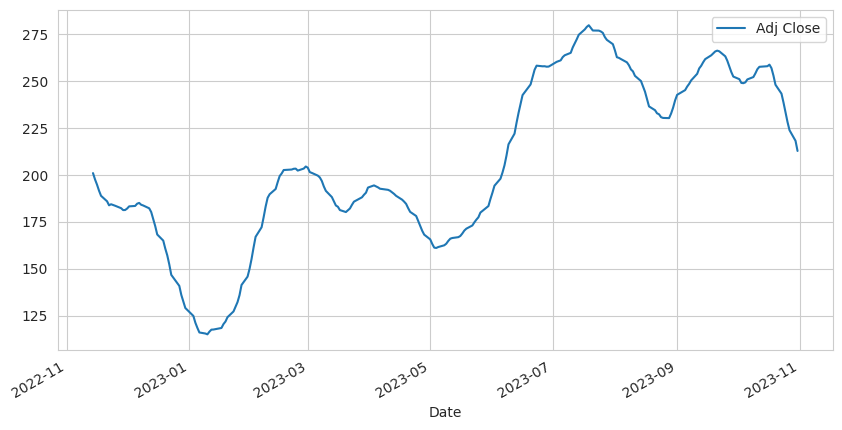

In [ ]:
#10 day moving average
TSLA_adj_close_data = TSLA["Adj Close"].rolling(10).mean()
TSLA_adj_close_data.plot(legend=True, figsize=(10, 5))

<Axes: xlabel='Date'>

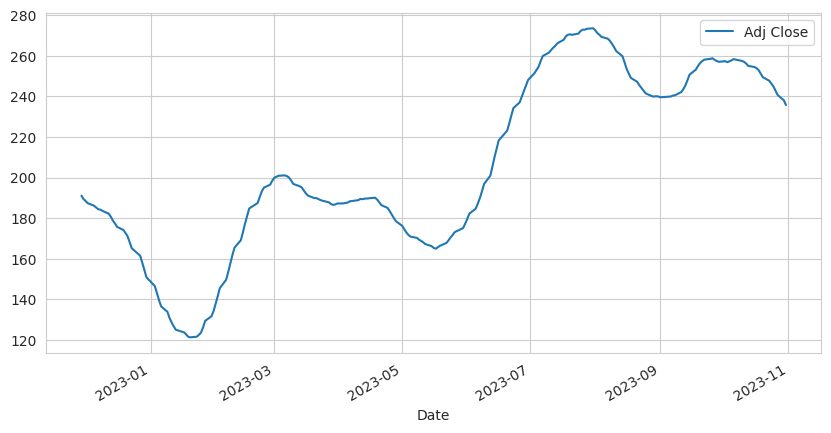

In [ ]:
#20 day moving average
TSLA_adj_close_data = TSLA["Adj Close"].rolling(20).mean()
TSLA_adj_close_data.plot(legend=True, figsize=(10, 5))

<Axes: xlabel='Date'>

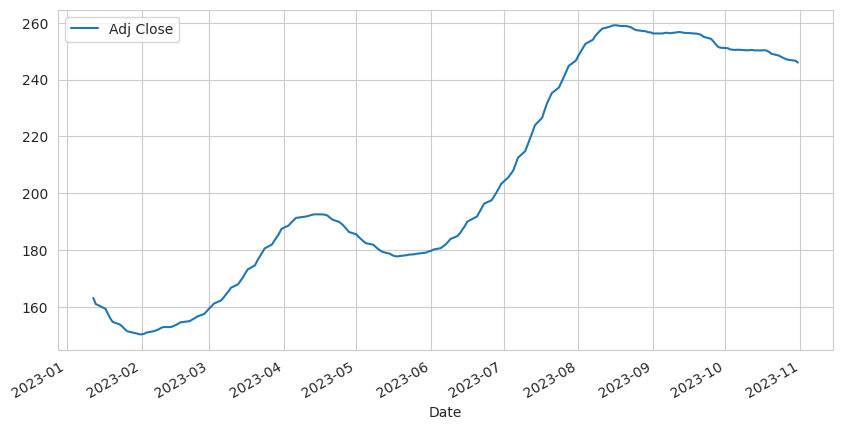

In [ ]:
#50 day moving average
TSLA_adj_close_data = TSLA["Adj Close"].rolling(50).mean()
TSLA_adj_close_data.plot(legend=True, figsize=(10, 5))

percent change (daily return) of the stock.

<Axes: xlabel='Date'>

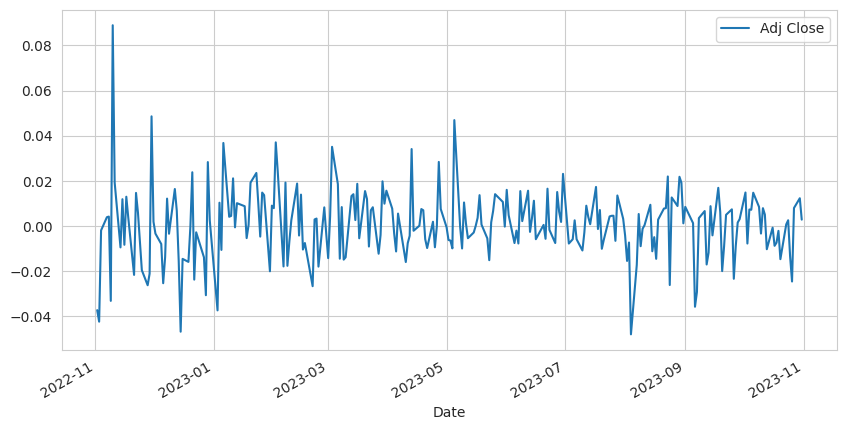

In [ ]:
AAPL['Adj Close'].pct_change().plot(legend = True, figsize = (10, 5))

In [ ]:
closing_prices = web.get_data_yahoo(stock_list,start,endtime)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [ ]:
closing_prices

,AAPL,AMZN,GOOG,NVDA,TSLA
Date,,,,,
2022-11-01,149.761551,96.790001,90.500000,135.347198,227.820007
2022-11-02,144.174698,92.120003,87.070000,132.109207,214.979996
2022-11-03,138.060974,89.300003,83.489998,134.127960,215.309998
2022-11-04,137.792130,90.980003,86.699997,141.473450,207.470001
2022-11-07,138.329819,90.529999,88.650002,142.922577,197.080002
...,...,...,...,...,...
2023-10-25,171.100006,121.389999,126.669998,417.790009,212.419998
2023-10-26,166.889999,119.570000,123.440002,403.260010,205.759995
2023-10-27,168.220001,127.739998,123.400002,405.000000,207.300003


In [ ]:
returns = closing_prices.pct_change().dropna()

In [ ]:
returns

,AAPL,AMZN,GOOG,NVDA,TSLA
Date,,,,,
2022-11-02,-0.037305,-0.048249,-0.037901,-0.023924,-0.056360
2022-11-03,-0.042405,-0.030612,-0.041116,0.015281,0.001535
2022-11-04,-0.001947,0.018813,0.038448,0.054765,-0.036413
2022-11-07,0.003902,-0.004946,0.022491,0.010243,-0.050080
2022-11-08,0.004175,-0.006075,0.002933,0.021048,-0.029328
...,...,...,...,...,...
2023-10-25,-0.013492,-0.055772,-0.095989,-0.043149,-0.018936
2023-10-26,-0.024606,-0.014993,-0.025499,-0.034778,-0.031353
2023-10-27,0.007969,0.068328,-0.000324,0.004315,0.007484


<Axes: >

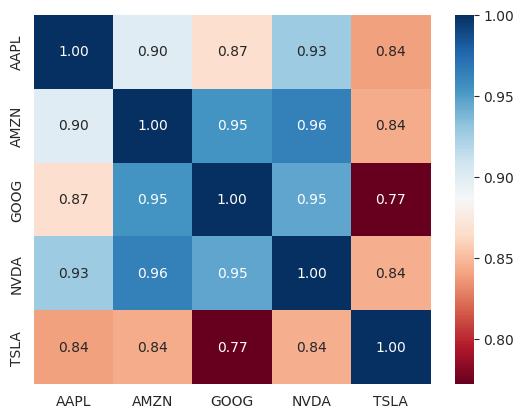

In [ ]:
# heatmap of correlations between the closing prices of Apple, Amazon, Google, Nvidia, and Tesla
sns.heatmap(closing_prices.corr(), cmap = 'RdBu', annot = True, fmt = '.2f')

<Axes: >

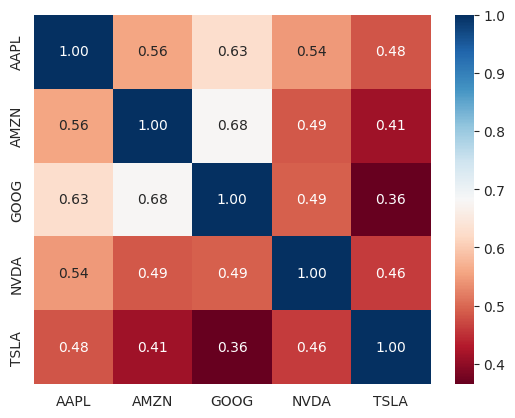

In [ ]:
# heatmap of the correlations of the returns of Apple, Amazon, Google, Nvidia, and Tesla
sns.heatmap(returns.corr(), cmap = 'RdBu', annot = True, fmt = '.2f')

**Stock List**:
1. NVIDIA Corp. (NVDA)
2. JP Morgan & Chase (JPM)
3. Chevron Corporation (CVX)
4. The Walt Disney Company (DIS)
5. Amazon.com Inc. (AMZN)
6. Pfizer Inc. (PFE)
7. Microsoft Corporation (MSFT)
8. Delta Air Lines, Inc. (DAL)
9. Exxon Mobil Corporation (XOM)
10. Visa Inc. (V)

In [ ]:
endtime = datetime.now()
start = datetime(endtime.year-1,endtime.month,endtime.day)

my_stock_list = ['NVDA', 'JPM', 'CVX', 'DIS', 'AMZN', 'PFE', 'MSFT', 'DAL', 'XOM', 'V']

for stock in my_stock_list:
    globals()[stock] = web.get_data_yahoo(stock, start = start, end = endtime)

my_closing_prices = web.get_data_yahoo(my_stock_list,start,endtime)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


<Axes: xlabel='Date'>

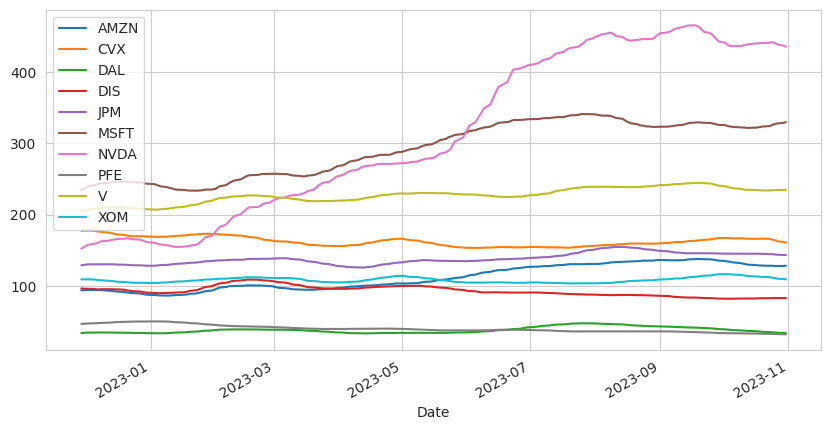

In [ ]:
my_closing_prices.rolling(20).mean().plot(legend = True, figsize = (10, 5))

<Axes: xlabel='Date'>

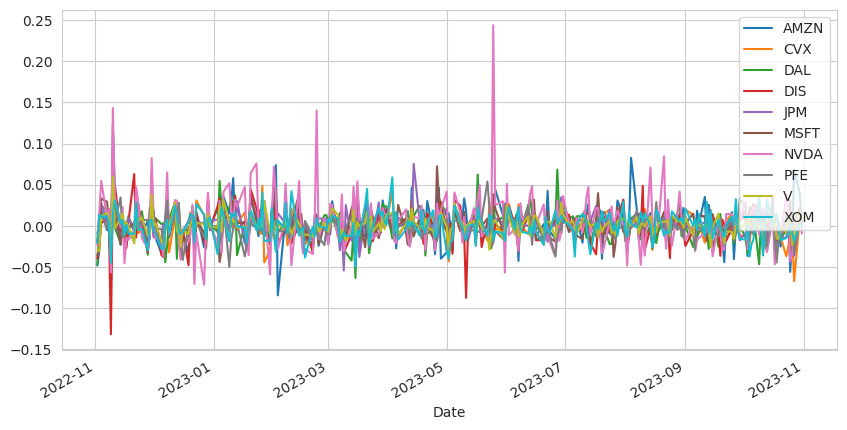

In [ ]:
my_closing_prices.pct_change().plot(legend = True, figsize = (10, 5))

<Axes: >

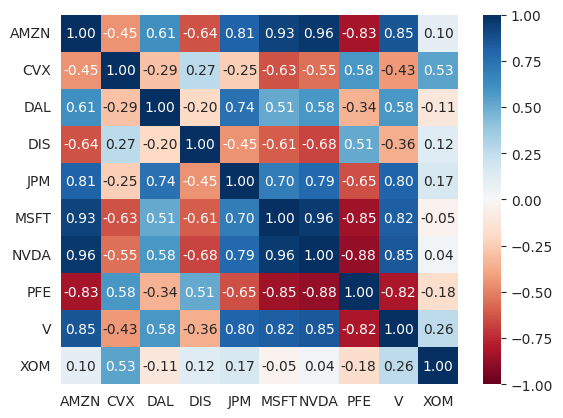

In [ ]:
sns.heatmap(my_closing_prices.corr(), cmap = 'RdBu', annot = True, fmt = '.2f', vmin = -1, vmax = 1)

**Provide your explanation here:**

Top 5 picks are Nvidia, Chevron, Walt Disney Company, Pfizer, and Microsoft.

From the graph of the 20 day moving average for the 10 given stocks, it appears that Nvidia and Microsoft are doing the best. Nvidia in particular has shown great returns at many points in the returns graph for the 10 given stocks. However, Microsoft and Nvidia's closing price performance have a strong positive correlation which means that these two stocks alone would not make for a well-rounded portfolio.

Thus, it would be a good idea to choose stock which have a negative correlation with Nvidia and Microsoft. Looking at the heatmap of the closing prices, Chevron, Pfizer, and Disney will do the trick.